In [14]:
import sys, os
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#DWave Credentials
dwave_solver = 'DW_2000Q_2_1'
api_key = 'DEV-ea3f2e364bc24729fc317e26d4d167016c5b08bf'

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

import dwave_networkx as dnx

### Use NetworkX graphic package to create a signed network
import networkx as nx

# Select a D-Wave system and handle mapping from problem graph to sampler graph
sampler = EmbeddingComposite(DWaveSampler(solver=dwave_solver, token=api_key))

In [38]:
# Import graph node labels
node_labels = []
with open('CryptoSymbols.csv') as f:
    for line in f.readlines():
        line = line.rstrip() 
        node_labels.append(line)
       
# Import correlation data
corr_matrices = sio.loadmat('P_mat.mat').get('P_mat')

In [77]:
def MakeGraph(corr_mat, node_labels, type):

    G=nx.Graph()
    G.add_nodes_from(node_labels)
    dim = corr_mat.shape[0]

    if not dim == len(node_labels):
        raise ValueError('number node labels not= corr matrix dimensions')

    if type=='signed':
        for i in range(dim):
            for j in range(i+1, dim):
                if corr_mat[i,j] < 0:
                    G.add_edge(node_labels[i], node_labels[j], sign=-1)
                elif corr_mat[i,j] > 0:
                    G.add_edge(node_labels[i], node_labels[j], sign=1)
    
    if type=='corr':
        for i in range(dim):
            for j in range(i+1, dim):
                if not corr_mat[i,j] == 0:
                    G.add_edge(node_labels[i], node_labels[j])
    
    if type=='uncorr':
        for i in range(dim):
            for j in range(i+1, dim):
                if corr_mat[i,j] == 0:
                    G.add_edge(node_labels[i], node_labels[j])
                
    return G        

C:\Users\Fas-SAMETRICA\Anaconda3\envs\py36\lib\site-packages\dwave_networkx\algorithms\coloring.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  bound = ceil(max(eigenvalues(nx.to_numpy_matrix(G))))


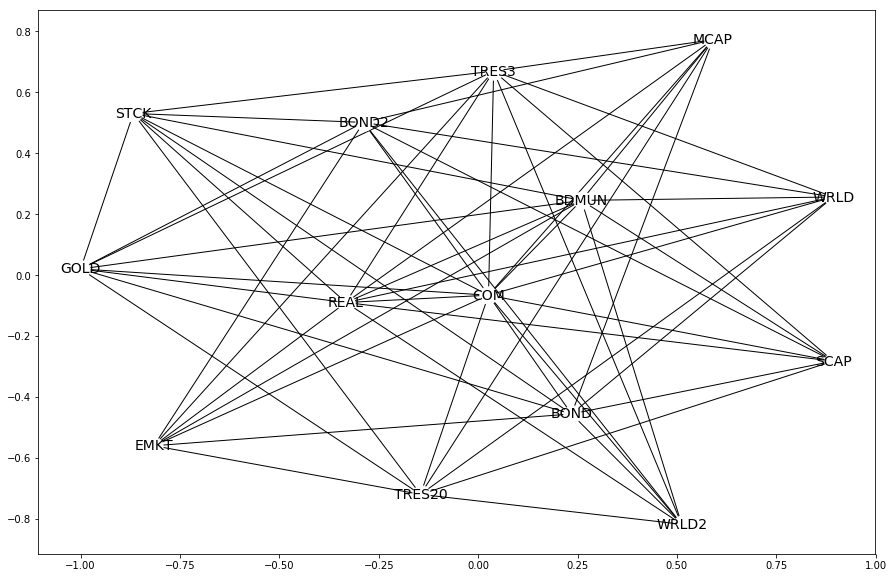

In [80]:
node_labels = ['STCK','MCAP','SCAP','TRES3','BOND','TRES20','BOND2','BDMUN','WRLD','WRLD2','EMKT','REAL','COM','GOLD']
corr_mat_df = pd.read_csv('AssetClasses.csv', header=None, names=node_labels)
corr_mat = corr_mat_df.values

# node_labels = ['EUR','AUD','BRL','CAD','CNY','DKK','HKD','INR','JPY','KRW','MYR','MXN','NZD','NOK','SGD','ZAR','LKR','SEK','CHF','TWD','TBT','GBP','VEF']
# corr_mats = sio.loadmat('S_mat_forex.mat').get('S_mat')
# corr_mat=corr_mats[3000,:,:]
# #corr_mat_df = pd.DataFrame(corr_mat, header=None, names=node_labels)

thresh = .5
corr_mat[(corr_mat>-thresh)&(corr_mat<thresh)]=0

G_type='uncorr'
G=MakeGraph(corr_mat,node_labels,type=G_type)

#imbalance, bicoloring = dnx.structural_imbalance(G, sampler)
coloring= dnx.min_vertex_coloring(G, sampler)
    
fig, ax = plt.subplots(figsize=(15, 10))
nx.draw_networkx(G,pos=nx.spring_layout(G), font_size=14, node_color='w', ax=ax)


In [81]:
coloring


{'STCK': 0,
 'TRES3': 1,
 'REAL': 2,
 'COM': 3,
 'GOLD': 4,
 'MCAP': 4,
 'SCAP': 6,
 'TRES20': 5,
 'BOND2': 8,
 'BDMUN': 5,
 'WRLD': 7,
 'WRLD2': 4,
 'EMKT': 8}

In [61]:
len(imbalance)/G_sign.number_of_edges()

0.132

In [53]:
# Plot Frustration score over time
frustration_array = []
density_array = []

for i in range(1,2):
    G = nx.Graph()
    G.add_nodes_from(node_labels)
    corr_matrix = corr_matrices

    # Add weighted edges to graph
    for i in range(14):
        for j in range(i+1, 14):
            if corr_matrix[i,j] < 0:
                G.add_edge(node_labels[i], node_labels[j], sign=-1)
            elif corr_matrix[i,j] > 0:
                G.add_edge(node_labels[i], node_labels[j], sign=1)
    
    density = (2*G.number_of_edges())/(14*13)
    
    try:
        imbalance, bicoloring = dnx.structural_imbalance(G, sampler)
        frustration_array.append(len(list(imbalance.keys()))/G.number_of_edges())
        density_array.append(density)
    except:
        print(sys.exc_info()[0])
        print(i)

NameError: name 'corr_matrices' is not defined

Text(0.5, 1.0, 'Frustration Score vs Time')

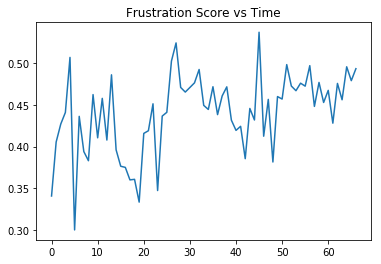

In [41]:


plt.figure(1)
plt.plot(frustration_array)
plt.title("Frustration Score vs Time")

Text(0.5, 1.0, 'Frustration Score vs Graph Density')

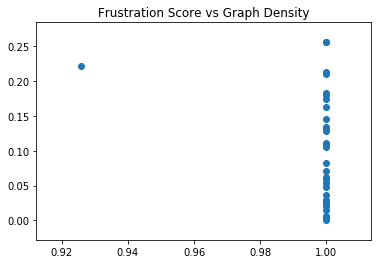

In [22]:
plt.figure(2)
plt.scatter(density_array, frustration_array)
plt.title("Frustration Score vs Graph Density")